<a href="https://colab.research.google.com/github/codewithdark-git/TensorFlow/blob/main/Regularization_with_L2_and_Dropout_in_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the data (scale pixel values to the range [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
# Convert labels to integers (not one-hot encoded for sparse categorical crossentropy)
y_train, y_test = y_train.flatten(), y_test.flatten()

In [4]:
# Define the CNN model with L2 regularization
def create_cnn_with_l2():
    model = models.Sequential([
        # First Conv2D block
        layers.Conv2D(
            filters=32, kernel_size=(3, 3), activation='relu',
            kernel_regularizer=regularizers.L2(0.001), input_shape=(32, 32, 3)
        ),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Conv2D block
        layers.Conv2D(
            filters=64, kernel_size=(3, 3), activation='relu',
            kernel_regularizer=regularizers.L2(0.001)
        ),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Third Conv2D block
        layers.Conv2D(
            filters=128, kernel_size=(3, 3), activation='relu',
            kernel_regularizer=regularizers.L2(0.001)
        ),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten and Fully Connected Layers
        layers.Flatten(),
        layers.Dense(
            units=256, activation='relu',
            kernel_regularizer=regularizers.L2(0.001)
        ),
        layers.Dropout(0.5),  # Dropout for additional regularization
        layers.Dense(
            units=10, activation='softmax',
            kernel_regularizer=regularizers.L2(0.001)
        )
    ])
    return model

In [5]:
# Create the model
model = create_cnn_with_l2()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    x_train, y_train, epochs=20, batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 98ms/step - accuracy: 0.2711 - loss: 2.1120 - val_accuracy: 0.4601 - val_loss: 1.6003
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.4834 - loss: 1.5624 - val_accuracy: 0.5313 - val_loss: 1.4456
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.5518 - loss: 1.4228 - val_accuracy: 0.5740 - val_loss: 1.3723
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.5832 - loss: 1.3621 - val_accuracy: 0.6233 - val_loss: 1.2628
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.6145 - loss: 1.3004 - val_accuracy: 0.6167 - val_loss: 1.2917
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 101ms/step - accuracy: 0.6340 - loss: 1.2572 - val_accuracy: 0.6416 - val_loss: 1.2459
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6520 - loss: 1.2292 - val_accuracy: 0.6678 - val_loss: 1.1913
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.6674 - loss: 1.1910 -

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 4s - 14ms/step - accuracy: 0.7223 - loss: 1.0937
Test Accuracy: 0.7223
Test Loss: 1.0937


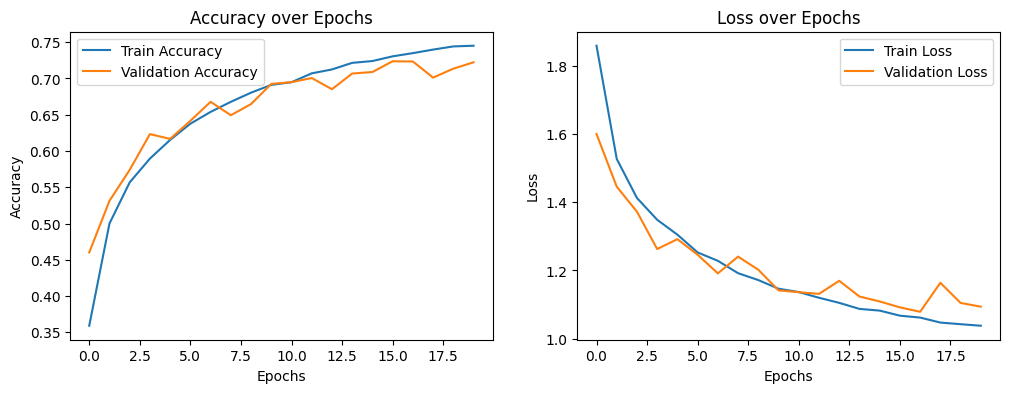

In [10]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()